# Exploratory Data Analysis on High Elo Chess Games Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('enriched_high_elo_games.csv')
df.head()

,white,black,white_elo,black_elo,result,opening,eco,site,time_control,termination,...,black_country,black_title,black_preferred_game,black_peak_bullet,black_peak_blitz,black_peak_rapid,black_peak_classical,black_total_wins,black_total_draws,black_total_losses
0,Alireza_rst0074,biagiobiagin92,2042,2158,0-1,Queen's Pawn Game: London System,D02,https://lichess.org/FFn9epZC,180+0,Normal,...,NaN,NaN,blitz,2231.0,2316.0,NaN,NaN,25533,3219,20707
1,SackofSasquatch,SilentHero,2191,2249,1/2-1/2,French Defense #2,C00,https://lichess.org/GQILS7lW,60+0,Normal,...,NaN,NaN,bullet,NaN,NaN,NaN,NaN,2072,139,554
2,Blitzki,ADNDADN,2237,2311,1/2-1/2,Indian Game,A45,https://lichess.org/Ni42gbx0,60+2,Normal,...,NaN,NaN,bullet,NaN,NaN,NaN,NaN,4342,1126,3573
3,mamurik,Cranken,2031,2270,1-0,Sicilian Defense: Four Knights Variation,B45,https://lichess.org/s8i4FPoy,300+0,Normal,...,NaN,NaN,blitz,NaN,NaN,NaN,NaN,10253,594,4830
4,Aurorachess11,par40,1808,2222,0-1,Mieses Opening,A00,https://lichess.org/0loDtHnm,60+0,Time forfeit,...,NaN,NaN,bullet,2457.0,2204.0,NaN,NaN,39613,2076,15431


## Basic Info and Structure

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   white                 1000 non-null   object 
 1   black                 1000 non-null   object 
 2   white_elo             1000 non-null   int64  
 3   black_elo             1000 non-null   int64  
 4   result                1000 non-null   object 
 5   opening               1000 non-null   object 
 6   eco                   1000 non-null   object 
 7   site                  1000 non-null   object 
 8   time_control          1000 non-null   object 
 9   termination           1000 non-null   object 
 10  white_country         0 non-null      float64
 11  white_title           43 non-null     object 
 12  white_preferred_game  1000 non-null   object 
 13  white_peak_bullet     257 non-null    float64
 14  white_peak_blitz      338 non-null    float64
 15  white_peak_rapid      

In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
white,1000,1000,Alireza_rst0074,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black,1000,1000,biagiobiagin92,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
white_elo,1000.0,NaN,NaN,NaN,2090.696,151.0429,1613.0,1998.0,2071.0,2170.0,2809.0
black_elo,1000.0,NaN,NaN,NaN,2097.335,148.737762,1576.0,2000.0,2081.0,2184.0,2787.0
result,1000,3,1-0,498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opening,1000,532,Caro-Kann Defense,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eco,1000,245,C00,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN
site,1000,1000,https://lichess.org/FFn9epZC,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_control,1000,79,180+0,262,NaN,NaN,NaN,NaN,NaN,NaN,NaN
termination,1000,3,Normal,649,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Missing Data Analysis

In [4]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0].sort_values(ascending=False)

white_country           1000
black_country           1000
white_peak_classical     988
black_peak_classical     988
black_title              968
white_title              957
black_peak_rapid         910
white_peak_rapid         905
white_peak_bullet        743
black_peak_bullet        739
black_peak_blitz         698
white_peak_blitz         662
dtype: int64

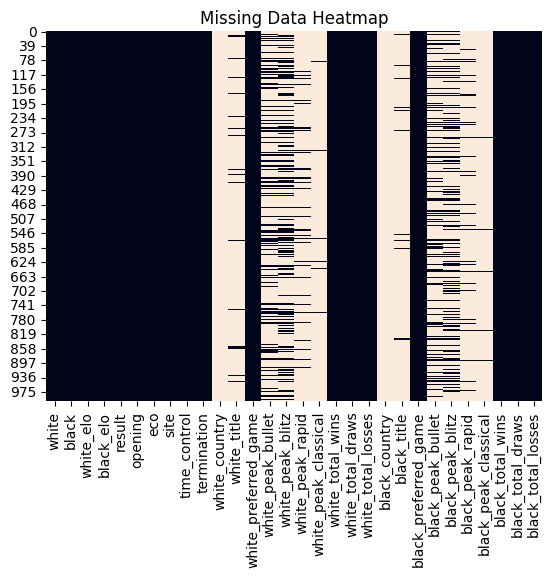

In [5]:
sns.heatmap(df.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

## Missing Data Handling

In [6]:
# Drop columns with 30% or lower non-null values (70% or more missing)
threshold = 0.30
df_cleaned = df.dropna(thresh=int(threshold * len(df)), axis=1)

# Check the shape after dropping the columns
print(f"Shape after dropping columns: {df_cleaned.shape}")

Shape after dropping columns: (1000, 20)


## Distribution of Elo Ratings

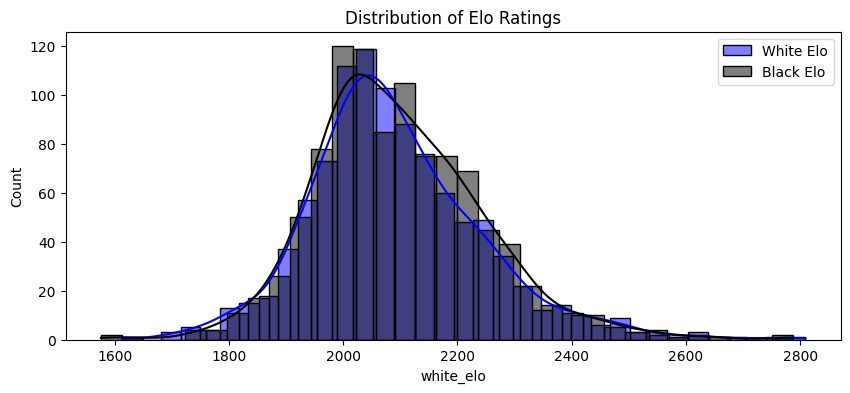

In [7]:
plt.figure(figsize=(10, 4))
sns.histplot(df_cleaned['white_elo'], kde=True, color='blue', label='White Elo')
sns.histplot(df_cleaned['black_elo'], kde=True, color='black', label='Black Elo')
plt.legend()
plt.title('Distribution of Elo Ratings')
plt.show()

## Echo Analysis for Avg. Total game

In [8]:
# Compute total games and win rate for white
df['white_total_games'] = df['white_total_wins'] + df['white_total_draws'] + df['white_total_losses']
df['white_win_rate'] = df['white_total_wins'] / df['white_total_games']

# Compute total games and win rate for black
df['black_total_games'] = df['black_total_wins'] + df['black_total_draws'] + df['black_total_losses']
df['black_win_rate'] = df['black_total_wins'] / df['black_total_games']

# Handle division by zero and missing data (median imputation)
white_median_games = df[df['white_total_games'] > 0]['white_total_games'].median()
black_median_games = df[df['black_total_games'] > 0]['black_total_games'].median()

white_median_win_rate = df[df['white_total_games'] > 0]['white_win_rate'].median()
black_median_win_rate = df[df['black_total_games'] > 0]['black_win_rate'].median()

# Impute
df['white_total_games'] = df['white_total_games'].replace(0, white_median_games)
df['white_win_rate'] = df['white_win_rate'].fillna(white_median_win_rate)

df['black_total_games'] = df['black_total_games'].replace(0, black_median_games)
df['black_win_rate'] = df['black_win_rate'].fillna(black_median_win_rate)

# Cell 4: Compute average experience per game (combined)
df['avg_total_games'] = (df['white_total_games'] + df['black_total_games']) / 2

# Cell 5: Top ECO codes by average player experience
top_eco_experience = (
    df.groupby(['eco', 'opening'])['avg_total_games']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Display top 10 ECO codes by average player experience
top_eco_experience.head(20)

,eco,opening,avg_total_games
0,B02,"Alekhine Defense: Scandinavian Variation, Gesc...",143008.500000
1,B01,Scandinavian Defense: Blackburne Gambit,124670.500000
2,C25,Vienna Game: Anderssen Defense,111468.000000
3,C10,"French Defense: Rubinstein Variation, Blackbur...",102649.000000
4,C71,"Ruy Lopez: Morphy Defense, Modern Steinitz Def...",99722.500000
5,B07,Rat Defense: Balogh Defense,95902.000000
6,D27,"Queen's Gambit Accepted: Classical Defense, Ma...",93574.500000
7,D02,Queen's Gambit Refused: Baltic Defense,92815.000000
8,C21,Danish Gambit,91103.166667
9,C44,"King's Pawn Game: Tayler Opening, Inverted Hanham",87025.500000


## Preferred Game Types

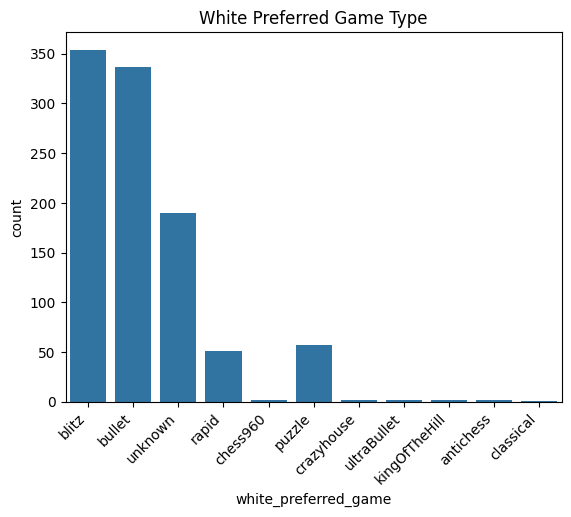

In [9]:
sns.countplot(x='white_preferred_game', data=df_cleaned)
plt.title('White Preferred Game Type')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels by 45 degrees for better readability
plt.show()

## Game Result Distribution

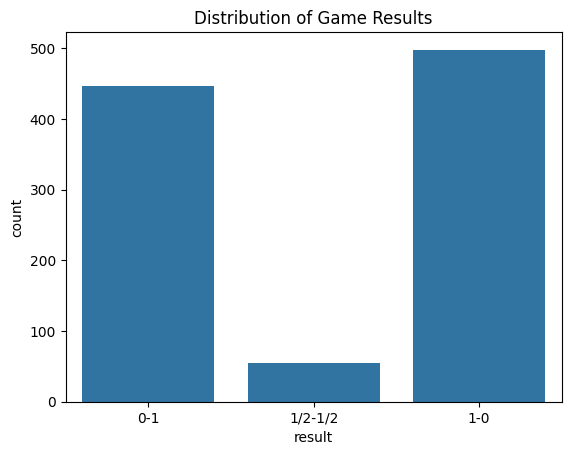

In [10]:
sns.countplot(x='result', data=df_cleaned)
plt.title('Distribution of Game Results')
plt.show()

## Opening Analysis

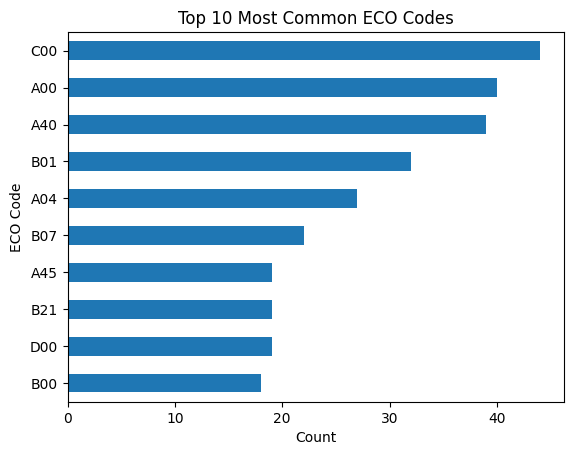

In [11]:
# Get the top 10 most common ECO codes
top_eco = df_cleaned['eco'].value_counts().head(10)

# Plot the top 10 most common ECO codes
top_eco.plot(kind='barh')
plt.title('Top 10 Most Common ECO Codes')
plt.gca().invert_yaxis()
plt.xlabel('Count')
plt.ylabel('ECO Code')
plt.show()

## Elo vs Game Result

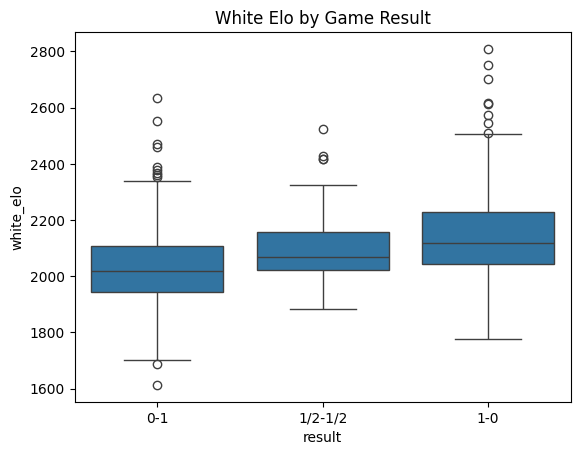

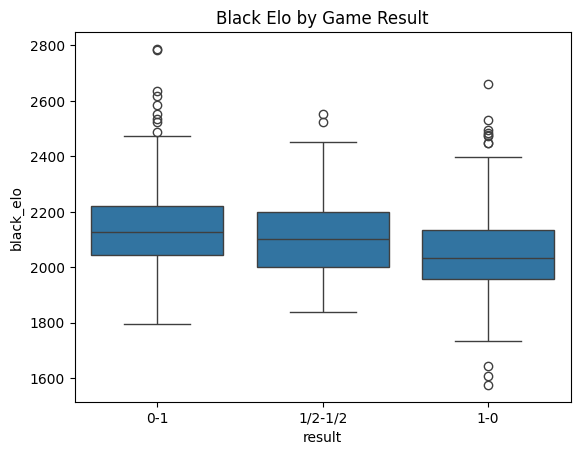

In [12]:
sns.boxplot(x='result', y='white_elo', data=df_cleaned)
plt.title('White Elo by Game Result')
plt.show()

sns.boxplot(x='result', y='black_elo', data=df_cleaned)
plt.title('Black Elo by Game Result')
plt.show()

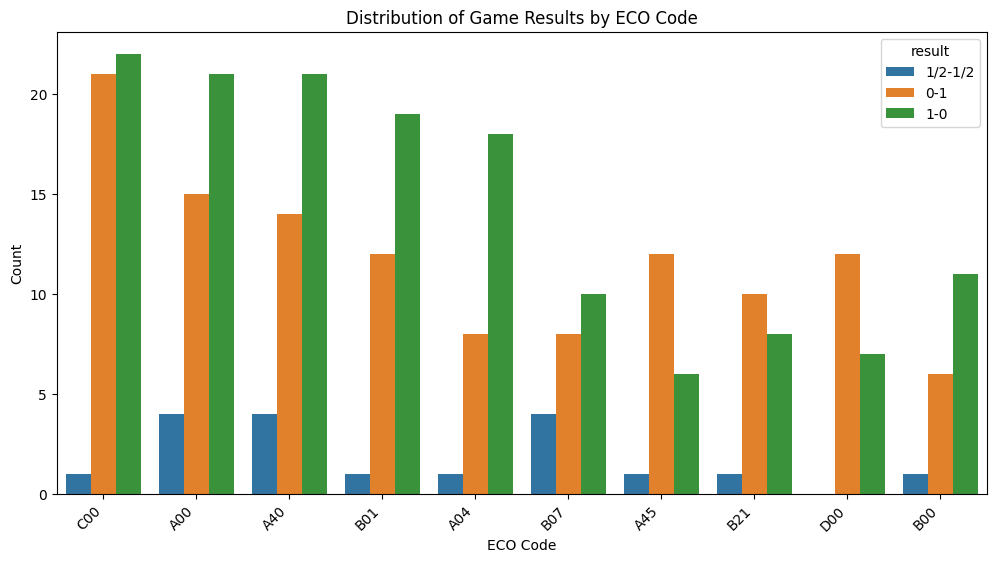

In [13]:
# Get the top 10 most common ECO codes
top_eco = df_cleaned['eco'].value_counts().head(10)

# Create a new DataFrame that only includes the top 10 ECO codes
top_eco_df = df_cleaned[df_cleaned['eco'].isin(top_eco.index)]

# Plot the distribution of results for these ECO codes
plt.figure(figsize=(12, 6))
sns.countplot(x='eco', hue='result', data=top_eco_df, order=top_eco.index)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Game Results by ECO Code')
plt.xlabel('ECO Code')
plt.ylabel('Count')
plt.show()